In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

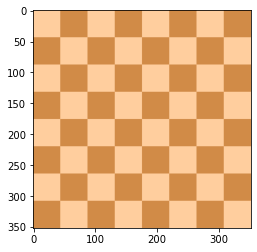

In [24]:
img = cv2.imread('flat_chessboard.png')
#img = cv2.imread('real_chessboard.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [25]:
img = cv2.imread('flat_chessboard.png')
#img = cv2.imread('real_chessboard.jpg')

# Brighten Image
hsv_img1 = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hue1, sat1, val1 = cv2.split(hsv_img1)
val1 = cv2.add(val1,130)
brght = cv2.merge((hue1, sat1, val1))
brght_img = cv2.cvtColor(brght, cv2.COLOR_HSV2BGR)

# Darken Image
hsv_img2 = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hue2, sat2, val2 = cv2.split(hsv_img2)
val2 = cv2.add(val2,-150)
dark = cv2.merge((hue2, sat2, val2))
dark_img = cv2.cvtColor(dark, cv2.COLOR_HSV2BGR)

# Sharpening Image with 3*3 kernel
kernel_3_3 = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
sharp_img_3_3 = cv2.filter2D(img, -1, kernel_3_3)

# Sharpening Image with 5*5 kernel
kernel_5_5 = np.array([[-1, -1, -1, -1, -1], [-1, -1, -1, -1, -1], [-1, -1, 25, -1, -1], [-1, -1, -1, -1, -1], [-1, -1, -1, -1, -1]])
sharp_img_5_5 = cv2.filter2D(img, -1, kernel_5_5)

In [26]:
# Converting color image to grayscale image for Harris corner detection
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_img = np.float32(gray_img)

gray_brght_img = cv2.cvtColor(brght_img, cv2.COLOR_BGR2GRAY)
gray_brght_img = np.float32(gray_brght_img)

gray_dark_img = cv2.cvtColor(dark_img, cv2.COLOR_BGR2GRAY)
gray_dark_img = np.float32(gray_dark_img)   

gray_sharp_3_img = cv2.cvtColor(sharp_img_3_3, cv2.COLOR_BGR2GRAY)
gray_sharp_3_img = np.float32(gray_sharp_3_img)   

gray_sharp_5_img = cv2.cvtColor(sharp_img_5_5, cv2.COLOR_BGR2GRAY)
gray_sharp_5_img = np.float32(gray_sharp_5_img)

# Applying cornerHarris function
dst = cv2.cornerHarris(gray_img,2,3,0.04)
dst2 = cv2.cornerHarris(gray_brght_img,2,3,0.04)
dst3 = cv2.cornerHarris(gray_dark_img,2,3,0.04)
dst4 = cv2.cornerHarris(gray_sharp_3_img,2,3,0.04)
dst5 = cv2.cornerHarris(gray_sharp_5_img,2,3,0.04)

In [27]:
# Counting number of corner points
corners = np.zeros(dst.shape)
corners2 = np.zeros(dst2.shape)
corners3 = np.zeros(dst3.shape)
corners4 = np.zeros(dst4.shape)
corners5 = np.zeros(dst5.shape)

corners[dst > 0.01*dst.max()] = 255
corners2[dst2 > 0.01*dst2.max()] = 255
corners3[dst3 > 0.01*dst3.max()] = 255
corners4[dst4 > 0.01*dst4.max()] = 255
corners5[dst5 > 0.01*dst5.max()] = 255

a = []
a.append(np.argwhere(corners==255))
a2 = []
a2.append(np.argwhere(corners2==255))
a3 = []
a3.append(np.argwhere(corners3==255))
a4 = []
a4.append(np.argwhere(corners4==255))
a5 = []
a5.append(np.argwhere(corners5==255))

num_corners = len(a[0])
num_corners2 = len(a2[0])
num_corners3 = len(a3[0])
num_corners4 = len(a4[0])
num_corners5 = len(a5[0])

In [28]:
# Dilation for making the corners not important
dst = cv2.dilate(dst,None)
dst2 = cv2.dilate(dst2,None)
dst3 = cv2.dilate(dst3,None)
dst4 = cv2.dilate(dst4,None)
dst5 = cv2.dilate(dst5,None)

In [29]:
# Thresholding for an optimal value
img[dst > 0.01 * dst.max()] = [0,0,255]
brght_img[dst2 > 0.01 * dst2.max()] = [0,0,255]
dark_img[dst3 > 0.01 * dst3.max()] = [0,0,255]
sharp_img_3_3[dst4 > 0.01 * dst4.max()] = [0,0,255]
sharp_img_5_5[dst5 > 0.01 * dst5.max()] = [0,0,255]

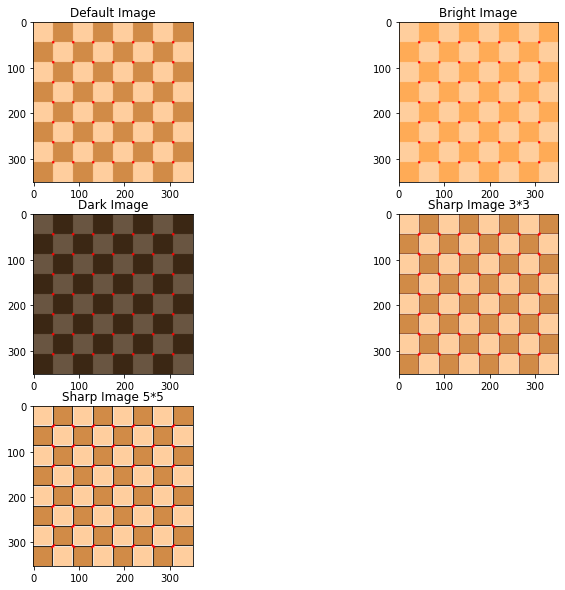

In [30]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
brght_img = cv2.cvtColor(brght_img, cv2.COLOR_BGR2RGB)
dark_img = cv2.cvtColor(dark_img, cv2.COLOR_BGR2RGB)
sharp_img_3_3 = cv2.cvtColor(sharp_img_3_3, cv2.COLOR_BGR2RGB)
sharp_img_5_5 = cv2.cvtColor(sharp_img_5_5, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(12,10))

ax = fig.add_subplot(3,2,1)
ax.set_title('Default Image')
ax.imshow(img)

ax2 = fig.add_subplot(3,2,2)
ax2.set_title('Bright Image')
ax2.imshow(brght_img)

ax3 = fig.add_subplot(3,2,3)
ax3.set_title('Dark Image')
ax3.imshow(dark_img)

ax4 = fig.add_subplot(3,2,4)
ax4.set_title('Sharp Image 3*3')
ax4.imshow(sharp_img_3_3)

ax4 = fig.add_subplot(3,2,5)
ax4.set_title('Sharp Image 5*5')
ax4.imshow(sharp_img_5_5)

plt.show()

In [31]:
print()
print("The number of Harris corners in the Normal image is:", num_corners)
print("The number of Harris corners in the Brightened image is:", num_corners2)
print("The number of Harris corners in the Darkened image is:", num_corners3)
print("The number of Harris corners in the Sharpened image with a 3*3 kernel is:", num_corners4)
print("The number of Harris corners in the Sharpened image with a 5*5 kernel is:", num_corners5)


The number of Harris corners in the Normal image is: 441
The number of Harris corners in the Brightened image is: 441
The number of Harris corners in the Darkened image is: 441
The number of Harris corners in the Sharpened image with a 3*3 kernel is: 735
The number of Harris corners in the Sharpened image with a 5*5 kernel is: 833


In [32]:
brght_feat_match = round((num_corners/num_corners2)*100, 2)
dark_feat_match = round((num_corners/num_corners3)*100, 2)
shrp_3_feat_match = round((num_corners/num_corners4)*100, 2)
shrp_5_feat_match = round((num_corners/num_corners5)*100, 2)

print()
print("% of features in the original image have {}% matching features in brighten image".format(brght_feat_match))
print("% of features in the original image have {}% matching features in darken image".format(dark_feat_match))
print("% of features in the original image have {}% matching features in sharpen 3*3 image".format(shrp_3_feat_match))
print("% of features in the original image have {}% matching features in sharpen 5*5 image".format(shrp_5_feat_match))


% of features in the original image have 100.0% matching features in brighten image
% of features in the original image have 100.0% matching features in darken image
% of features in the original image have 60.0% matching features in sharpen 3*3 image
% of features in the original image have 52.94% matching features in sharpen 5*5 image


- For 'real_chessboard.jpg' image, brightening image increases detection of corners whereas it is otherwise for darkening image
- For 'flat_chessboard.png' image, brightening and darkening does not affect detection of corner points
- Sharpening image increases detection of corners, moreover 5\*5 kernel detects more corners than 3\*3